# 煮西米

先放结论

`煮西米至透明全过程 = (煮5分钟, 等15分钟) * 4`

最近买了一袋西米, 是白色的小颗粒, 没想到奶茶里的西米露是这玩意儿煮出来的

网上翻了一些视频, 发现煮这玩意儿还挺有技巧, 准备实验一下

## 冷水和热水

先试一下不同水温的区别, 分别导入冷水和沸水, 静置5min


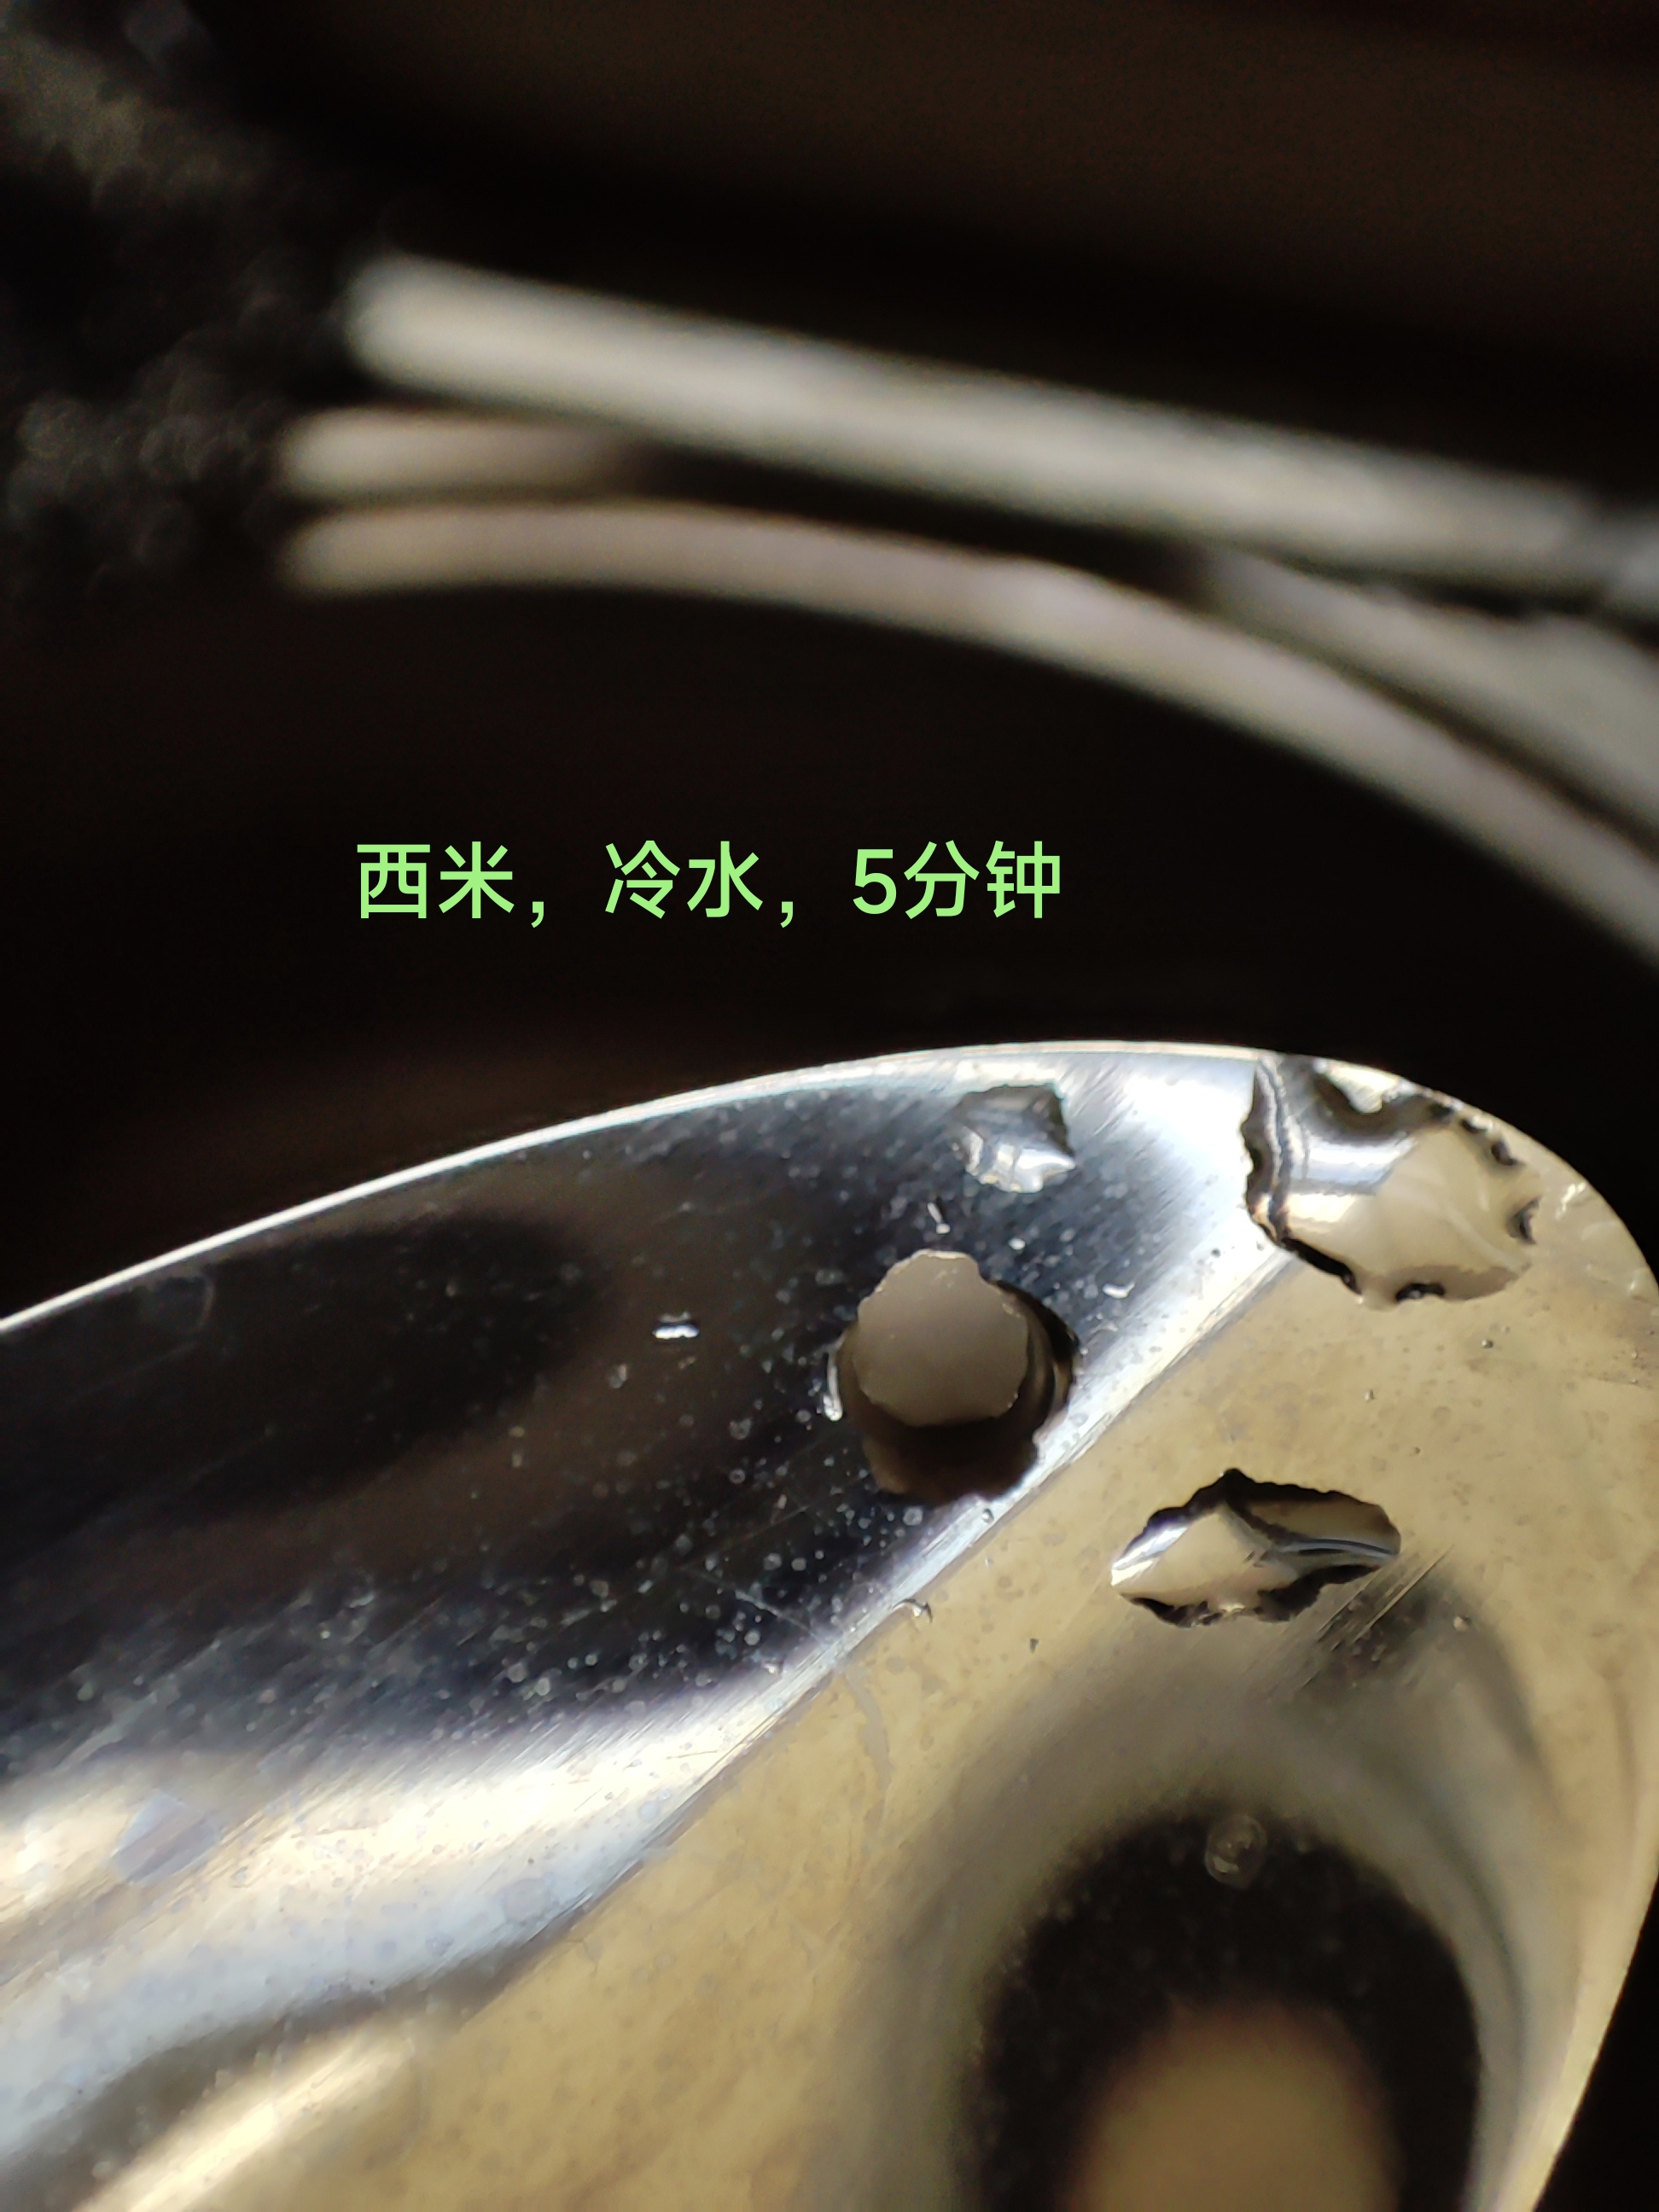

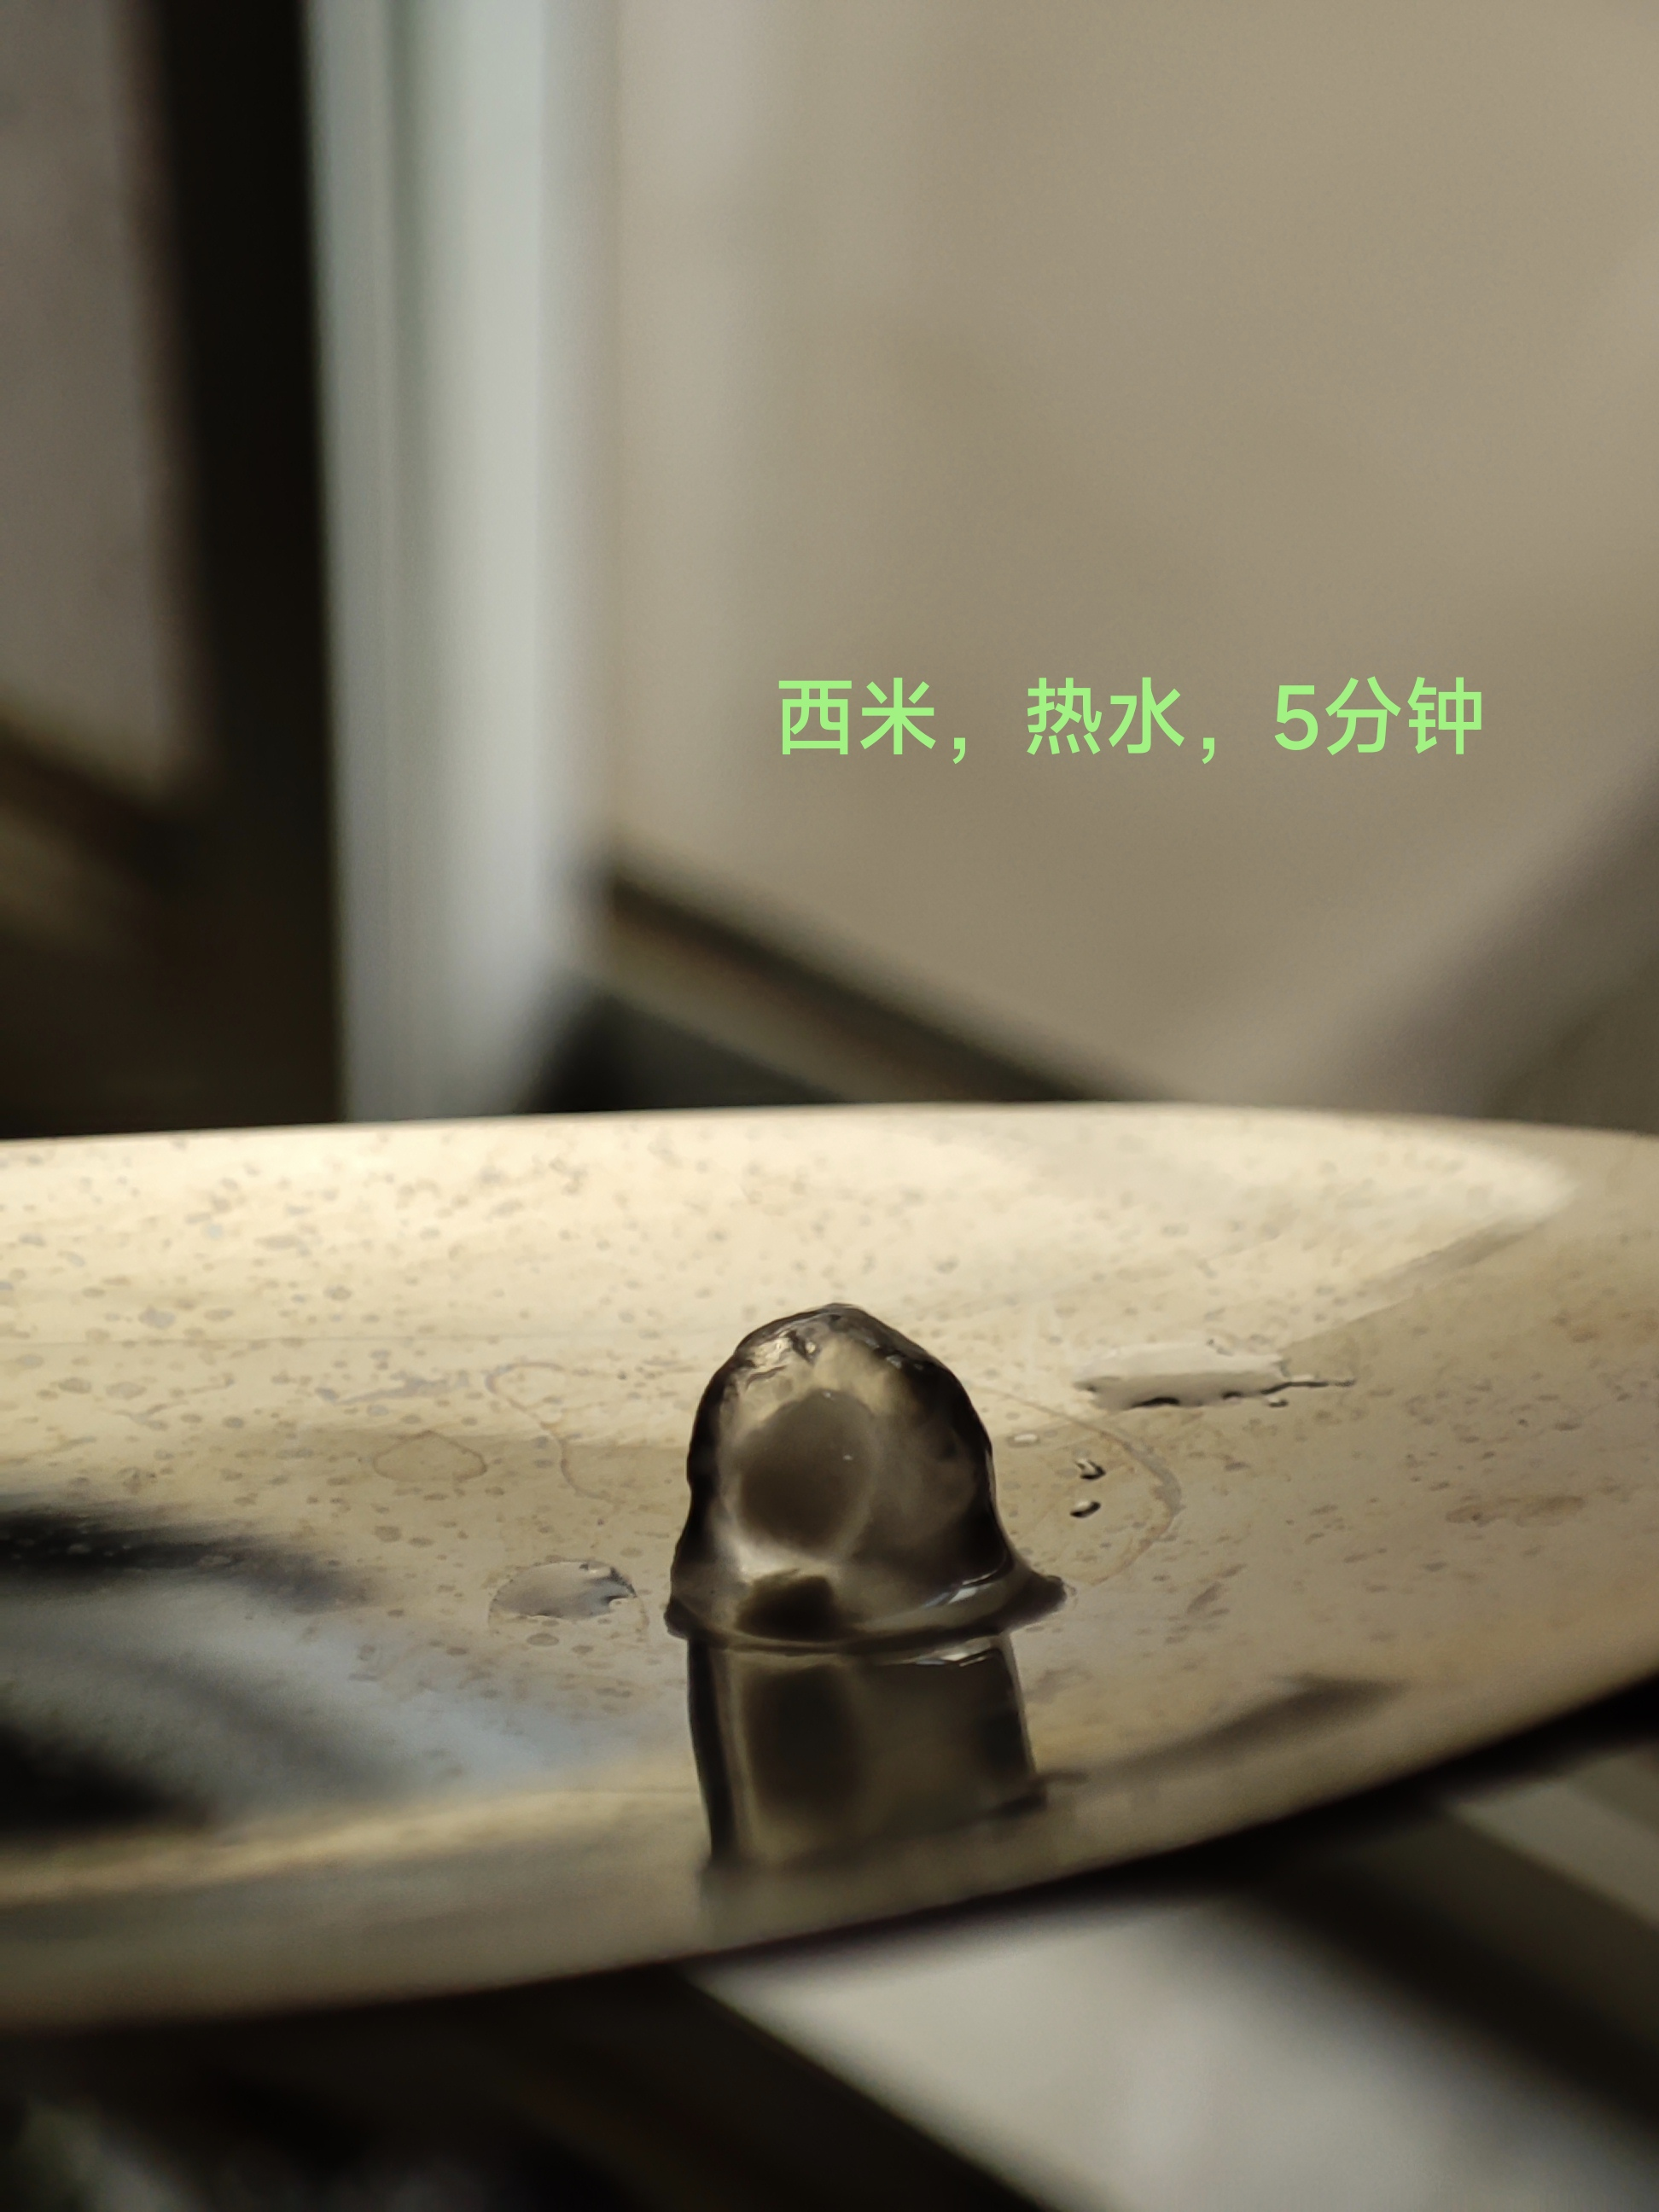

In [1]:
from IPython.display import Image, display
    
display(Image('./imgs/1.jpg',  width=300))
display(Image('./imgs/2.jpg',  width=300))

## 煮

发现冷水只会把西米泡散, 而热水会使得其淀粉变性, 吸水变透明

看来是必须要煮的, 边计时边煮

In [2]:
# 字体设置
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# 修复字体找不到的bug
font_manager._get_fontconfig_fonts.cache_clear()

# 获取系统已安装的字体路径
font_paths = sorted( font_manager.findSystemFonts() )

# 这里使用思源黑体 https://github.com/adobe-fonts/source-han-sans
chinese_font = 'SourceHan'

# 选择一个支持中文的字体路径
chinese_font_path = None
for font_path in font_paths:
    if chinese_font in font_path:
        chinese_font_path = font_path
        break

# 如果找到了支持中文的字体路径，则设置为默认字体
if chinese_font_path:
  name = font_manager.FontProperties(fname=chinese_font_path).get_name()
  plt.rcParams['font.family'] = name

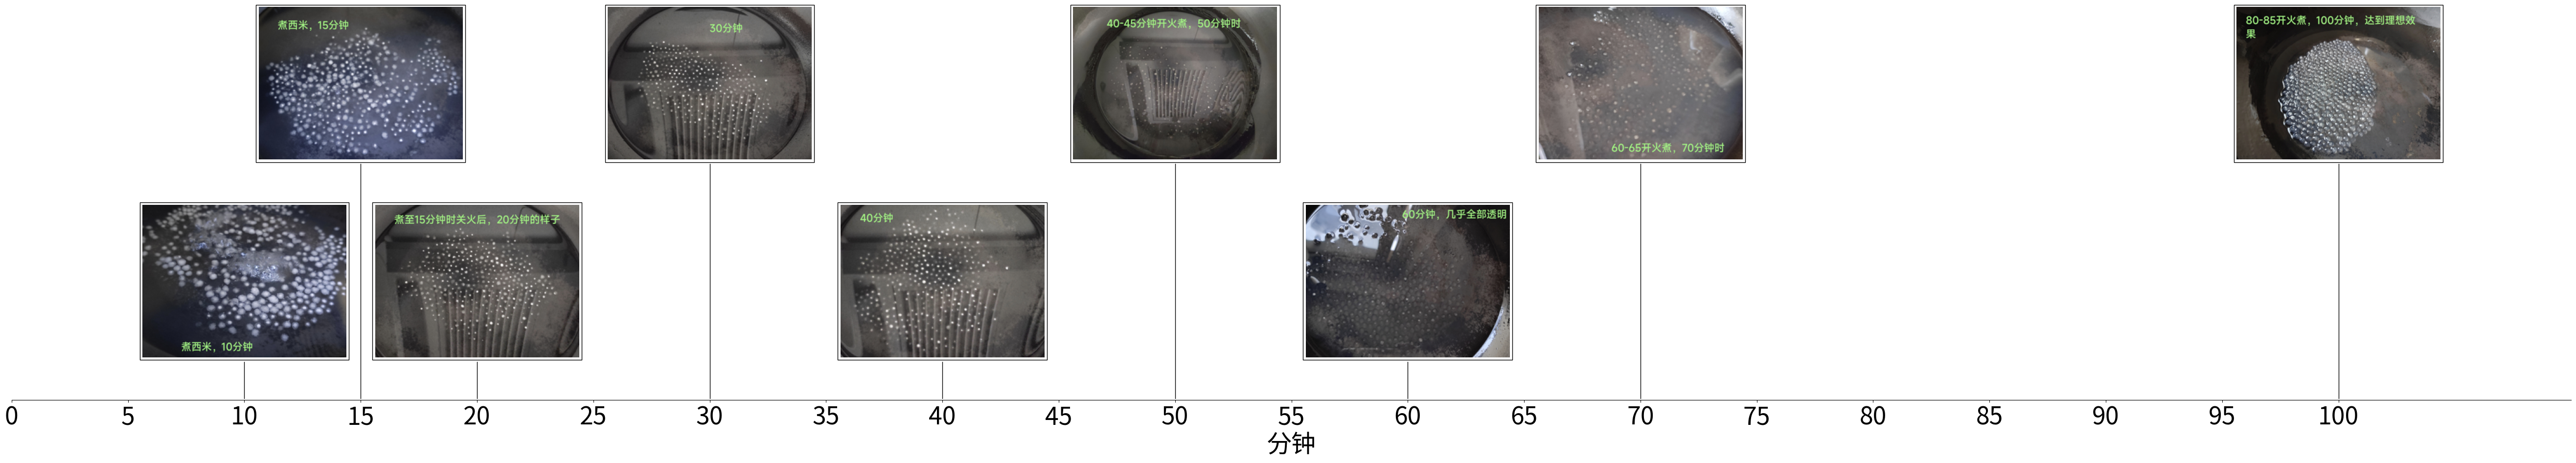

In [4]:
import re
import glob
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

imgsFolder = './imgs'

timelineImgs = glob.glob(f"{imgsFolder}/*min.jpg")
imgsCount = len(timelineImgs)

dates =  np.arange(0, 101, 5)

imgWidth = 300 
dpi = 100
imgDpi = imgWidth / dpi

imgGapW = 2.5
imgGapH = 3.5

offsetH = .7

fig, ax = plt.subplots(figsize=(imgsCount * imgDpi * imgGapW, imgDpi *  imgGapH  ), dpi = dpi)

# 在时间轴上插入图片
for i in range(1, imgsCount + 1 ):
  imgPath = timelineImgs[i-1]
  img = Image.open(imgPath)
  aspect_ratio = img.width / img.height
  imgHeight = imgWidth / aspect_ratio
  img = img.resize((int(imgWidth), int(imgHeight)))
  imagebox = OffsetImage(img)  # 可以通过zoom参数调整图像大小
  
  match = re.search(r"\d+", imgPath)
  t = match.group()
  ab = AnnotationBbox(imagebox, 
                      xy=(int( t ), 0 ) ,
                      xybox=(int( t ), imgGapH / 2 * ( 1 + ( i % 2 )  ) - offsetH),   arrowprops=dict( arrowstyle="-",
                        connectionstyle="angle,angleA=0,angleB=90,rad=3")
                     )
  ax.add_artist(ab)
  ax.set_xlim(0, dates[ len( dates )-1 ] * 1.1)
  ax.set_ylim(0, imgGapH)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', labelsize=12 * imgDpi)

plt.xticks(dates)
plt.yticks([])
ax.set_xlabel('分钟', fontdict={'fontsize': 12 * imgDpi })

plt.show()

一开始煮了10分钟, 发现有些效果

继续煮, 直到15分钟时想起网上视频只煮了几分钟就关火了, 于是此时尝试关火等待

等到20分钟, 确实发现透明部分变多了, 继续

等到40分钟, 发现和30分钟时区别变化不大, 里面白色部分依然是生的, 于是再次开火煮5分钟

果然需要煮才能让内部白色部分继续糊化

之后就循环煮5分钟, 等15分钟的循环, 到100分钟时基本完全透明了

回想一下, 一开始可能不需要煮15分钟, 而是煮5分钟即可

总结一下大致流程可以是

`煮西米至透明全过程 = (煮5分钟, 等15分钟) * 4`

总共需要80分钟, 不得不说这玩意儿确实料理起来比较烦

![CC](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg) [ MXXXXXS ](https://github.com/MXXXXXS/ximi)